In [1]:
import matplotlib.pyplot as plt
from hexmax import find_best, number_mappings
from time import time
from random import randint
import numpy as np

In [60]:
def average_time(func, attr_callback, attempts):
    times = []
    for i in range(attempts):
        start_time = time()
        func(*attr_callback())
        times.append(time() - start_time)
    return np.average(times)

In [61]:
lengths = []
times = []
for i in range(10, 2000, 50):
    original = tuple(number_mappings[randint(0, 15)] for k in range(i))
    times.append(
        average_time(find_best, lambda: (tuple(number_mappings[randint(0, 15)] for k in range(i)), 100, 100, 0), 5)
    )
    lengths.append(i)

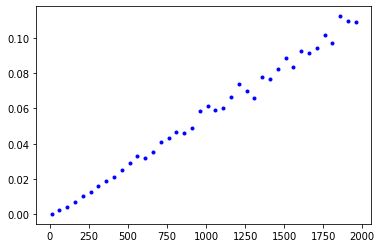

In [62]:
plt.plot(lengths, times, "b.")

In [68]:
all_lengths = {}
all_times = {}
for max_moves in range(100, 1000, 200):
    start_time = time()
    all_lengths[max_moves] = []
    all_times[max_moves] = []
    for i in range(10, 2000, 100):
        original = tuple(number_mappings[randint(0, 15)] for k in range(i))
        all_times[max_moves].append(
            average_time(
                find_best,
                lambda: (tuple(number_mappings[randint(0, 15)] for k in range(i)), max_moves, max_moves, 0), 
                5
            )
        )
        all_lengths[max_moves].append(i)
    print(f"{max_moves} done in {time()-start_time}s")

100 done in 5.270646572113037s
300 done in 14.05261778831482s
500 done in 21.75846219062805s
700 done in 28.441025972366333s
900 done in 32.57271122932434s


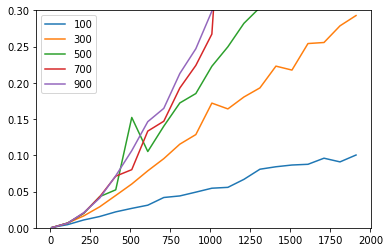

In [69]:
for k in all_lengths:
    plt.plot(all_lengths[k], all_times[k])
plt.ylim(0, 0.3)
plt.legend(list(all_lengths.keys()))